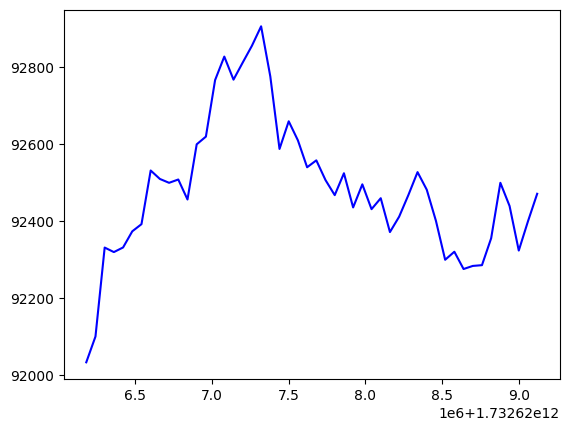

92447.88
92454.6
92460.31
92471.99
92500.0
92500.0
92499.99
92499.78
92480.0
92492.0
92453.13
92467.99
92467.99
92467.98
92471.64
92469.08
92469.07
92471.46


NetworkError: binance GET https://api.binance.com/api/v3/klines?interval=1m&limit=50&symbol=BTCUSDT

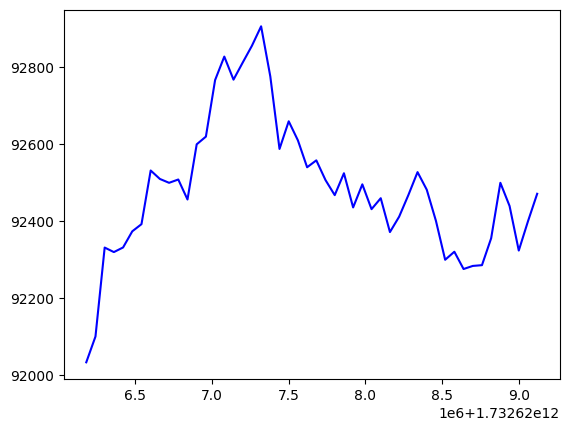

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Iterable
import pandas as pd
from IPython import display

from stocksense.api.data import get_endpoint

plt.ion()
fig, ax = plt.subplots(1, 1)
hdisplay = display.display(None, display_id=True)

def iplt(ax, x: np.array, y: Iterable[np.array], *, hdisplay, colors=['b']):
    if ax.lines:
        for idx, line in enumerate(ax.lines):
            line.set_xdata(x)
            line.set_ydata(y[idx])
    else:
        for idx, color in enumerate(colors):
            ax.plot(x, y[idx], color)
    hdisplay.update(fig)

def update_data(df: pd.DataFrame) -> bool:
    iplt(ax, df.unix, [df.close], hdisplay=hdisplay)
    print(df.close.iloc[-1])
    return True

ep = get_endpoint('binance')
await ep.watch_ticker('BTC/USDT', "1m", update_data, limit=50, interval=2)